# XGBoosting Algorithm

XGBoost (eXtreme Gradient Boosting) is one of the Gradient Boosted Machine algorithms. It ensembles (combines) optimized model by taking trained models from all the preceding iterations. XGBoost regularizes the variables (parameters) to reduce the overfit and can work well with variables having missing values. It is empowered with built-in cross validation to reduce the boosting iterations; hence offers better performance along with parallel processing on distributed systems such as Hadoop. By tuning the XGBoost hyper parameters, we can achieve well optimized model that can make more accurate predictions. XGBoost uses Fscore to measure the importance of  variables. Following table explains the hyper-parameters of XGBoost algorithm and also given the python code implementing XGBoost algorithm for sale price predictions.

In [13]:
import os
import numpy as np 
import pandas as pd
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import operator

from sklearn.metrics import mean_squared_error
from sklearn import cross_validation, metrics 

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [14]:
print(os.getcwd())
print("")

train = pd.read_csv("../data/train_after_feature_engineering.csv")
test = pd.read_csv("../data/test_after_feature_engineering.csv")

print ('The train data has {0} rows and {1} columns'.format(train.shape[0],train.shape[1]))    
print ('The test data has {0} rows and {1} columns'.format(test.shape[0],test.shape[1]))


/home/mcheruvu/git/hid306/project/code

The train data has 1460 rows and 307 columns
The test data has 1459 rows and 306 columns


In [15]:
np.random.seed(1234)

_xgb_algo = xgb.XGBRegressor(
                 colsample_bytree=0.8,
                 colsample_bylevel = 0.8,
                 gamma=0.01,
                 learning_rate=0.05,
                 max_depth=5,
                 min_child_weight=1.5,
                 n_estimators=6000,                                                                  
                 reg_alpha=0.5,
                 reg_lambda=0.5,
                 subsample=0.7,
                 seed=42,
                 silent=1)

# Fit the Model

In [16]:
target_vector = pd.DataFrame(index = train.index, columns=["SalePrice"])
target_vector["SalePrice"] = train["SalePrice"]
target_vector["SalePrice"] = np.log1p(target_vector["SalePrice"]) # log(SalePrice) + 1

train.drop(['SalePrice'], axis=1, inplace=True)

_xgb_algo.fit(train, target_vector)    

XGBRegressor(base_score=0.5, colsample_bylevel=0.8, colsample_bytree=0.8,
       gamma=0.01, learning_rate=0.05, max_delta_step=0, max_depth=5,
       min_child_weight=1.5, missing=None, n_estimators=6000, nthread=-1,
       objective='reg:linear', reg_alpha=0.5, reg_lambda=0.5,
       scale_pos_weight=1, seed=42, silent=1, subsample=0.7)

# Feature Importance

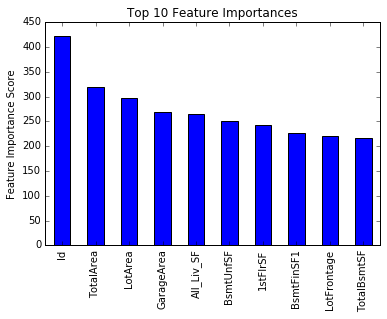

In [18]:
plt.figure()
feat_imp = pd.Series(_xgb_algo.booster().get_fscore()).sort_values(ascending=False)[0:10] 
plot = feat_imp.plot(kind='bar', title='Top 10 Feature Importances', figsize =(6,4))
plt.ylabel('Feature Importance Score')

plot = plt.gcf()

plot.savefig("../images/xgboost_feature_importance.pdf", bbox_inches='tight')

# Predict the Test Sale Price

In [60]:
y_train = target_vector
y_train_pred = _xgb_algo.predict(train)
    
rmse_train = np.sqrt(mean_squared_error(y_train,y_train_pred))

print("XGBoost score on training set: ", rmse_train)

y_test_pred = _xgb_algo.predict(test)

print(y_test_pred[5:])

('XGBoost score on training set: ', 0.043285815452145097)
[ 12.02621555  12.03620052  12.02542019 ...,  11.99086189  11.64435196
  12.27700043]


# Save Predictions

In [61]:
df_predict = pd.DataFrame({'Id': test["Id"], 'SalePrice': np.exp(y_test_pred) - 1.0})
#df_predict = pd.DataFrame({'Id': id_vector, 'SalePrice': sale_price_vector})

df_predict.to_csv('../data/kaggle_python_xgboost.csv', header=True, index=False)

print('...file is saved')

...file is saved
